<a href="https://colab.research.google.com/github/zorsebolotanshiyolo/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn-0.preppywallpapers.com/wp-content/uploads/2019/08/Sunflower-iPhone-Wallpaper-12.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://24.media.tumblr.com/tumblr_m62rnbWYCG1r7pl96o1_500.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Sunflower-beautiful-abstract-HD-Wallpapers-for-Desktop-3840x2400-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://ohbestdayever.com/wp-content/uploads/2017/12/rustic-chic-sunflower-wedding-centerpiece-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://68.media.tumblr.com/bb9bfb867323a3e93773875676b98719/tumblr_ooueh73xiF1vwiyffo2_500.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/04/24/3f/04243f00fb840dbb79f197339ea31830.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.wohhwedding.com/wp

In [4]:
from bing_image_downloader import downloader
downloader.download("shuttlecock",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from https://www.gifmania.co.uk/Sports-Animated-Gifs/Animated-Badminton/Badminton-Shuttlecock-82909.gif
[%] File Downloaded !

[%] Downloading Image #2 from https://www.bing.com/th/id/OGC.ec34e71934253674bdf9532d0d0a56d2?pid=1.7&amp;rurl=https%3a%2f%2fwww.gifmania.co.uk%2fSports-Animated-Gifs%2fAnimated-Badminton%2fBadminton-Shuttlecock-82909.gif&amp;ehk=PWQkSLUTxir%2bmT3sSmmQhZon9ItKo66DIceV6hiJaDM%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.ec34e71934253674bdf9532d0d0a56d2?pid=1.7&amp;rurl=https%3a%2f%2fwww.gifmania.co.uk%2fSports-Animated-Gifs%2fAnimated-Badminton%2fBadminton-Shuttlecock-82909.gif&amp;ehk=PWQkSLUTxir%2bmT3sSmmQhZon9ItKo66DIceV6hiJaDM%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from http://cdn.onlinewebfonts.com/svg/img_531317.png
[%] File Downloaded !

[%] Downloading Image #3 from https://media1.tenor.com/images/5f208e3f3a376f6c9f9867ae7d143546/tenor.g

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower','shuttlecock']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)    
target = np.array(target)
images = np.array(images)



In [13]:
len(flat_data[0])

67500

In [14]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

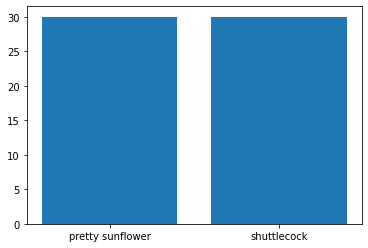

In [16]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param_grid)
grid.fit(x_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
y_pred =grid.predict(x_test)
y_pred


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [34]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
accuracy_score(y_pred,y_test)

0.9444444444444444

In [42]:
confusion_matrix(y_pred,y_test)

array([[10,  0],
       [ 1,  7]])

In [43]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95        10\n           1       1.00      0.88      0.93         8\n\n    accuracy                           0.94        18\n   macro avg       0.95      0.94      0.94        18\nweighted avg       0.95      0.94      0.94        18\n'

In [44]:
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [45]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://5.imimg.com/data5/UE/OR/MY-19880050/white-shuttle-cock-500x500.jpg
(500, 500, 3)
 PREDICTED OUTPUT: shuttlecock


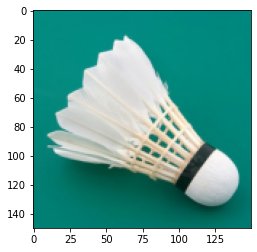

In [46]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')
